<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git
!pip install -r ./Vietnamese-HTR/requirements.txt

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 5137, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 5137 (delta 86), reused 26 (delta 11), pack-reused 4987
Receiving objects: 100% (5137/5137), 525.76 MiB | 29.61 MiB/s, done.
Resolving deltas: 100% (183/183), done.
Checking out files: 100% (4802/4802), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 8.0 MB/s 
     |████████████████████████████████| 409 kB 29.8 MB/s 
     |████████████████████████████████| 596 kB 46.9 MB/s 
     |████████████████████████████████| 140 kB 54.3 MB/s 
     |████████████████████████████████| 280 kB 56.0 MB/s 
     |████████████████████████████████| 948 kB 53.3 MB/s 
     |████████████████████████████████| 1.1 MB 48.9 MB/s 
     |████████████████████████████████| 144 kB 54.4 MB/s 
     |████████████████████████████████| 27

In [2]:
import glob
import json
import time
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import random
random.seed(42)

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer
import cv2
import numpy as np
from PIL import Image, ImageFont, ImageDraw


# Inference

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

# config['weights'] = './weights/transformCopy of erocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp6bq76dmk/dl
100%|██████████| 152M/152M [00:03<00:00, 38.3MB/s]


In [7]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip
! rm sample.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 108MB/s]


In [5]:
dir = "./Vietnamese-HTR/data/0825_DataSamples_1"
def infer(detector, image_dir, image_extensions):
    times = []
    paths = []
    for ext in image_extensions:
        paths.extend([path for path in Path(image_dir).rglob('*.'+ext)])

    for path in paths:
        img = Image.open(str(path))
        plt.imshow(img)
        start = time.time()
        s = detector.predict(img, return_prob=True)
        end = time.time()
        times.append(end-start)
        print(s)
        plt.show()
    print("Average inference time: ", sum(times)/len(times))

In [ ]:
!git clone https://github.com/LapTQ/handwritten_text_recognition
!pip install -r ./handwritten_text_recognition/requirements.txt
!apt-get install libx11-xcb1

fatal: destination path 'handwritten_text_recognition' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libx11-xcb1 is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-xcb1 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
image_dir = "./test-data/DataCVOCR"
image_extension = "jpg"
for path in Path(image_dir).rglob('*.'+image_extension):
    !python3 ./handwritten_text_recognition/run.py --input {str(path)} --output path/to/folder

2022-07-21 00:29:50.061097: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[INFO] Image is not blurry.
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.7/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.

2022-07-21 00:30:12.070317: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[INFO] Image is not blurry.
[INFO] Proposed corners are not good.
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr

# Prepare the dataset
Very large dataset (594.000 images)
- en_00: 100000
- en_01: 100000
- vi_00: 100000 
- vi_01: 100000 
- Các ảnh có màu giấy (màu nền) khá giống nhau
- meta: 144000 
- random: 50000

Vietnamese Handwritten Address Dataset
- train: 1829
- test: 549

MCOCR2021
- train: 1546
- test: 390

BKAI Scene Text
- train: 
- test: 


## Crawl datasets


Vietnamese Handwritten Address Dataset
- ./Vietnamese-HTR/data

BKAI Scene Text

In [ ]:
! gdown https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
! gdown https://drive.google.com/uc?id=1_Z4zY2Wk7vtxepUhUzttfddkM2b9cap2
! gdown https://drive.google.com/uc?id=1AhEwdTOxByNiHLfZcxFm83ZtPivxGJlS
! gdown https://drive.google.com/uc?id=1PLW2eGsMSVXZahZ7GvEz5Kr1uvyLnxbx
! unzip -qq -o ./vietnamese_original.zip -d ./scenetext_dataset
! unzip -qq -o ./train_imgs.zip -d ./scenetext_dataset
! unzip -qq -o ./train_gt.zip -d ./scenetext_dataset
! unzip -qq -o ./public_test_imgs.zip -d ./scenetext_dataset
! rm ./vietnamese_original.zip
! rm ./train_imgs.zip
! rm ./train_gt.zip
! rm ./public_test_imgs.zip

Downloading...
From: https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
To: /content/vietnamese_original.zip
100% 1.05G/1.05G [00:09<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_Z4zY2Wk7vtxepUhUzttfddkM2b9cap2
To: /content/train_imgs.zip
100% 96.2M/96.2M [00:03<00:00, 29.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AhEwdTOxByNiHLfZcxFm83ZtPivxGJlS
To: /content/train_gt.zip
100% 166k/166k [00:00<00:00, 69.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PLW2eGsMSVXZahZ7GvEz5Kr1uvyLnxbx
To: /content/public_test_imgs.zip
100% 68.2M/68.2M [00:01<00:00, 55.2MB/s]


MCOCR 2021

In [9]:
! gdown https://drive.google.com/uc?id=1FgCnaotis_NKTbgXdviTTDhrM2AvsdTT
! gdown https://drive.google.com/uc?id=1xL1NHwf00WWJUsPcS4plZEDmTPQqGUsW
!unzip -qq -o ./mcocr2021_private_test_data.zip -d ./mc_ocr
!unzip -qq -o ./mcocr2021_public_train_test_data.zip -d ./mc_ocr
!rm mcocr2021_private_test_data.zip
!rm mcocr2021_public_train_test_data.zip

Downloading...
From: https://drive.google.com/uc?id=1FgCnaotis_NKTbgXdviTTDhrM2AvsdTT
To: /content/mcocr2021_public_train_test_data.zip
100% 355M/355M [00:04<00:00, 76.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xL1NHwf00WWJUsPcS4plZEDmTPQqGUsW
To: /content/mcocr2021_private_test_data.zip
100% 89.9M/89.9M [00:00<00:00, 149MB/s]


VietOCR 1M

In [13]:
! gdown https://drive.google.com/uc?id=1vi9zY9_jnpqTGkBJ-eSt7tnnWEYTHuFr
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
! unzip -qq -o ./ocr_dataset.zip -d ./ocr_dataset
! unzip -qq -o ./data_line.zip -d ./ocr_dataset
! rm -rf ./ocr_dataset/InkData_line_processed/
! rm data_line.zip
! rm ocr_dataset.zip

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1vi9zY9_jnpqTGkBJ-eSt7tnnWEYTHuFr 

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
100% 61.2M/61.2M [00:00<00:00, 291MB/s]
unzip:  cannot find or open ./ocr_dataset.zip, ./ocr_dataset.zip.zip or ./ocr_dataset.zip.ZIP.
rm: cannot remove 'ocr_dataset.zip': No such file or directory


Test data

In [ ]:
! gdown https://drive.google.com/uc?id=16kDWDrNOxUmG1hNkE24fJ1fra8Pr_Jj-
!unzip  -qq -o ./DataCVOCR-20220720T235132Z-001.zip -d ./test-data
! rm DataCVOCR-20220720T235132Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=16kDWDrNOxUmG1hNkE24fJ1fra8Pr_Jj-
To: /content/DataCVOCR-20220720T235132Z-001.zip
100% 81.8M/81.8M [00:01<00:00, 56.5MB/s]


## Exploit, reorganize to VietOCR training format

Visualize some images

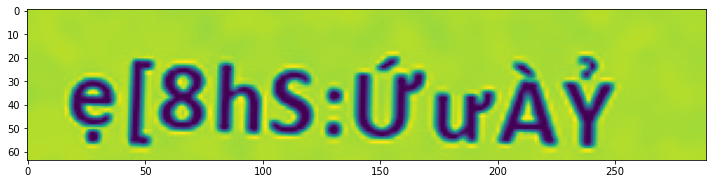

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 10.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("ocr_dataset/random/00045131.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im)
plt.show()

In [6]:
data_dir = Path("./mc_ocr/mcocr_public_train_test_shared_data/mcocr_train_data")

annote_df = pd.read_csv(data_dir /"mcocr_train_df.csv")
annote_df.head()

annotation_data = []

# s = annote_df.anno_polygons.iloc[0]
# # print(s)
# y = json.loads(s.replace("\'", "\""))
# print(y[0]['category_id'])
annote_df.anno_polygons = annote_df.anno_polygons.str.replace("\'", "\"").apply(json.loads)
# row_0 = annote_df.iloc[0]
# dict_0 = row_0.anno_polygons[0]
# print(dict_0)
for i, row in annote_df.iterrows():
    # read image as RGB and add alpha (transparency)
    im = Image.open(data_dir/ "train_images" / row.img_id).convert("RGBA")

    # convert to numpy (for convenience)
    imArray = np.asarray(im)

    for j, a_dict in enumerate(row.anno_polygons):
        poly = a_dict['segmentation'][0]
        # create mask
        maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
        ImageDraw.Draw(maskIm).polygon(poly, outline=1, fill=1)
        mask = np.array(maskIm)

        # assemble new image (uint8: 0-255)
        newImArray = np.empty(imArray.shape,dtype='uint8')

        # colors (three first columns, RGB)
        newImArray[:,:,:3] = imArray[:,:,:3]

        # transparency (4th column)
        newImArray[:,:,3] = mask*255

        # back to Image from numpy
        newIm = Image.fromarray(newImArray, "RGBA")
        newIm = newIm.crop(newIm.getbbox())

        image_path = data_dir /"cropped"/ str(row.img_id + '_' + str(j) +'.png')
        try:
            newIm.save(image_path)
        except:
            os.mkdir(data_dir/"cropped")
            newIm.save(image_path)
        annotation_data.append(f"{image_path}\t{row.anno_texts.split('|||')[j]}\n")
        # data.append(f"{img_dir_name}/{img_name}\t{labels[img_name]}\n")
# poly_int = np.array([[poly[i], poly[i+1]] for i in range(0, len(poly), 2)], dtype='int32')


In [7]:
def create_vietocr_annote(img_dir_name, data):
    #read the file
    root = Path("Vietnamese-HTR/data/")
    with open(root / img_dir_name / "labels.json") as file:
        labels = json.load(file)
    for img_name in labels:
        data.append(f"{root/ img_dir_name/ img_name}\t{labels[img_name]}\n")


create_vietocr_annote("0916_Data_Samples_2", annotation_data)
create_vietocr_annote("1015_Private_Test", annotation_data)

In [12]:
for path in Path('./ocr_dataset/random').rglob('*.jpg'):
    ann_file = str(path).split(".")[0] + ".txt"
    with open(ann_file) as file:
        annotation_data.append(f"{path}\t{file.readlines()[0]}\n")


In [8]:
def create_vietocr_dataline(annote_file, annotation_data):
    root = Path("./ocr_dataset/data_line")
    with open(root / annote_file) as f:
        for line in f.readlines():
            annotation_data.append(f"{str(root)}/{line}")

create_vietocr_dataline("test_line_annotation.txt", annotation_data)
create_vietocr_dataline("train_line_annotation.txt", annotation_data)

In [13]:
# annotation_data[-1]
len(annotation_data)

266253

In [35]:
for i,s in enumerate(annotation_data):
    s = s.replace("”", "\"")
    s = s.replace("“", "\"")
    s = s.replace("’", "\'")
    s = s.replace("ð", "đ")
    s = s.replace("™", "TM")
    s = s.replace("°", "o")
    s = s.replace("ü", "u")
    s = s.replace("ū", "ũ")
    s = s.replace("—", "-")
    s = s.replace("−", "-")
    s = s.replace("–", "-")
    s = s.replace("²", "2")
    s = s.replace("ā", "ã")
    s = s.replace("Ō", "Õ")
    s = s.replace("Ö", "O")
    s = s.replace("ō", "õ")
    s = s.replace("ö", "o")
    s = s.replace("Ā", "Ã")
    s = s.replace("Ð", "Đ")
    s = s.replace("ū", "ũ")
    s = s.replace("Ū", "Ũ")
    s = s.replace("Ü", "U")
    s = s.replace("€", "C")
    s = s.replace("…", "...")
    annotation_data[i] = s
! rm test_annotation.txt
! rm train_annotation.txt

In [36]:
# s = annotation_data[0]
# s
for s in annotation_data:
    if "–" in s:
        print(s)

In [38]:
random.shuffle(annotation_data)
train_test_ratio = 0.9
index = round(len(annotation_data)*train_test_ratio)
print(index)

#write back the file
with open("train_annotation.txt","w") as f:
    f.writelines(annotation_data[:index])
with open("test_annotation.txt","w") as f:
    f.writelines(annotation_data[index:])

239628


# Model exploration

## Transformer

In [ ]:
from torch import nn
from vietocr.tool.translate import translate, process_input
class OCR_Detector(nn.Module):
    def __init__(self, model, image_height = 32, 
                 image_max_width = 512, 
                 image_min_width = 32):
        super(OCR_Detector, self).__init__()
        self.model = model
        self.image_height = image_height
        self.image_max_width = image_max_width
        self.image_min_width = image_min_width
    def forward(self, img):
        # img = process_input(img, self.image_height, self.image_min_width, self.image_max_width)
        return translate(img, self.model)


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


File exists: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


('landladies', 0.9296376407146454)


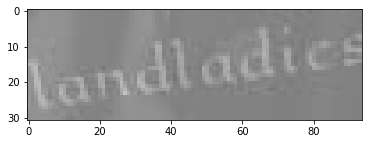

('Started', 0.2699110710195133)


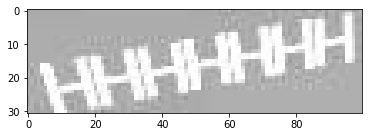

('khởi nghĩa lam sơn gồm ba giai đoạn lớn: hoạt động ở vùng núi thanh hoá (1418-1423)', 0.9313181107302746)


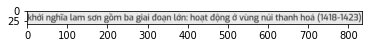

('[22]', 0.9113910794258118)


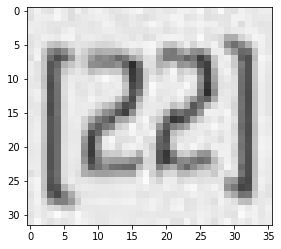

('statuses', 0.9267786890268326)


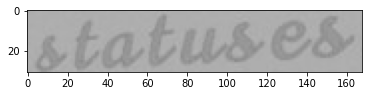

('2006 And Was Featured On Tech News Blog Techcrunch [1]', 0.926917102601793)


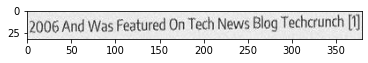

('ngoài ra rất phổ biến các loại rượu ngâm hỗn hợp nhiều loại động', 0.9307032525539398)


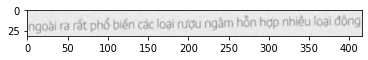

('1.21', 0.9322595298290253)


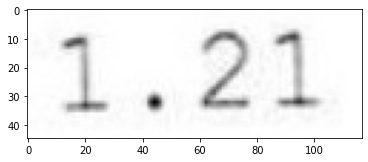

('Psi', 0.9288508693377177)


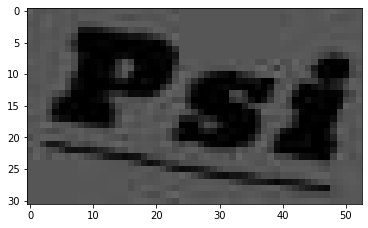

('Viêm da khác', 0.9296151151259741)


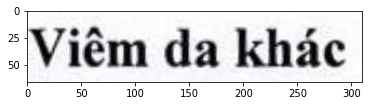

('Nguyễn Thị Hồng Huế', 0.9338393274106478)


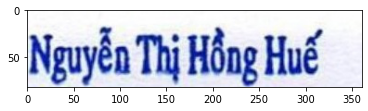

('05', 0.9232247471809387)


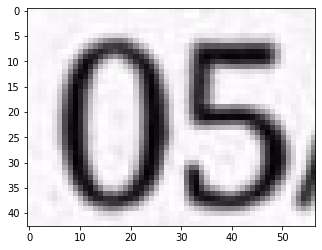

('2,625,400', 0.9313377605544196)


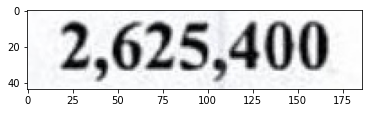

('Unmodified', 0.8822851955890656)


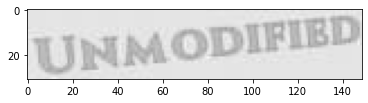

('1.00', 0.9293209314346313)


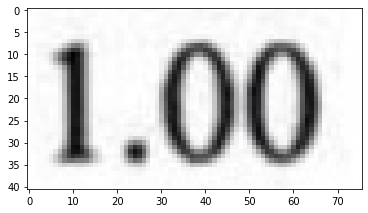

('Liên Hiệp Quốc vừa tuyên bố ngày 19-11 hằng năm là Ngày Toilet Thế giới, bắt đầu từ năm 2013', 0.9306184390316838)


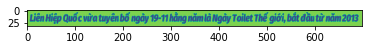

("she more than doubled the party's vote in the constituency", 0.9293332510981066)


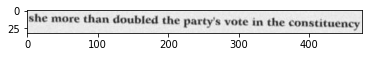

('BSCKII. LƯU CÔNG THÀNH', 0.9235138107429851)


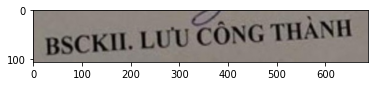

('Silliest', 0.9295167922973633)


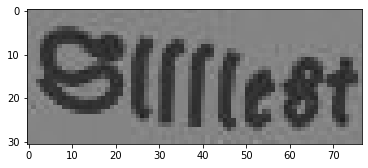

('FRESTORM', 0.9314016401767731)


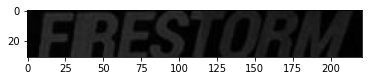

('REAL MADRID BẤT NGỜ ĐƯỢC TRỌNG TÀI CHO HƯỞNG MỘT QUẢ PENALTY GÂY TRANH CÃI', 0.929670367691968)


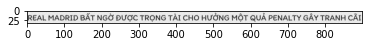

('Trong Đó Có Tổng Binh', 0.9327365699268523)


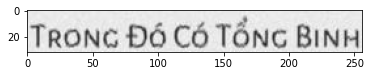

('Thanh Xuân - Hà Nội - Việt Nam', 0.9263884166876475)


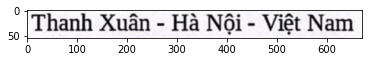

('Repurchases', 0.9295511787587946)


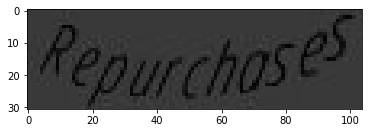

('- Như trên;', 0.8830574669621207)


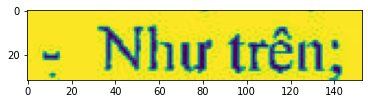

('0', 0.9362320303916931)


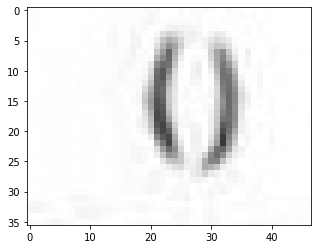

('Ecclesiastics', 0.9287946499311007)


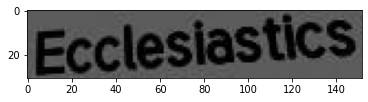

('Viêm mô tế bào và áp xe của miệng; (Viêm mô tế bào má 2 bên do răng 18,28,38,48 lệch ngầm trong xương)', 0.9307837386926016)


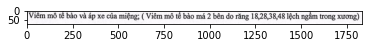

('these have come at a cost of selling land', 0.9288321602635268)


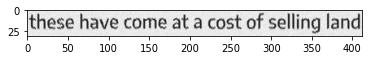

('MONIKER', 0.9323909878730774)


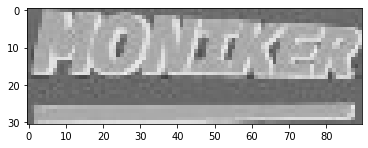

('NGUYỄN THỊ NGOÃN', 0.9315501637756824)


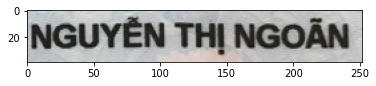

('036200006617', 0.9276107450326284)


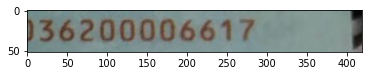

('PHAN THỊ HỒNG THÂM', 0.8814705146683587)


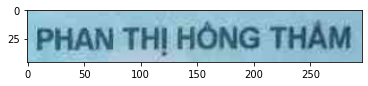

('ĐỖ THỊ ANH', 0.8941279411315918)


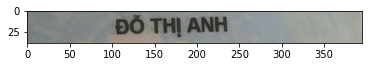

('072084003708', 0.9214775909980139)


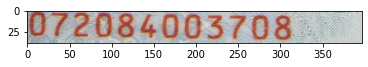

('001085019081', 0.9228006998697916)


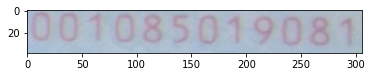

('038071004740', 0.9266267865896225)


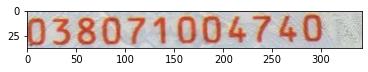

('HOÀNG THỊ NGỌC MAI', 0.9340046478642358)


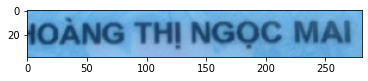

('ĐẶNG TRUNG LÝ', 0.9325634470352759)


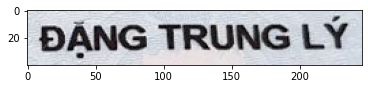

('BẠCH MỸ HẠNH', 0.9215707331895828)


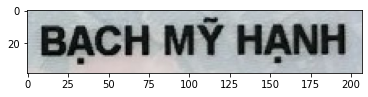

('072077001591', 0.9262435883283615)


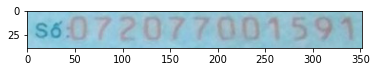

('0380000000390', 0.27476056722494274)


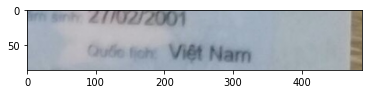

('LÊ VĂN THỨC', 0.9361746744676069)


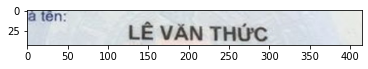

('031000000099', 0.37707164821525413)


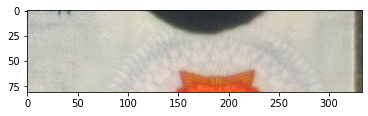

('072164001745', 0.9272668461004893)


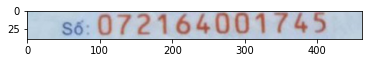

('077078001025', 0.9258091698090235)


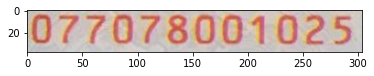

('NGUYỄN HỮU QUANG', 0.9346922934055328)


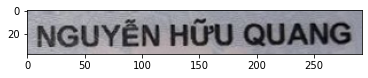

('ĐỒNG HUY THẮNG', 0.9211687530790057)


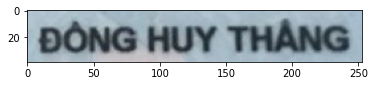

('030068003051', 0.9282825142145157)


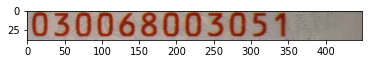

('VŨ THUỲ NINH', 0.8887305657068888)


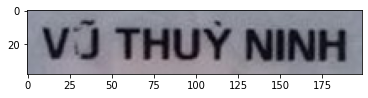

Average inference time:  0.16300997734069825


In [ ]:
infer(detector, "./sample/",["jpg", "jpeg"])

In [ ]:
detector.model

VietOCR(
  (cnn): CNN(
    (model): Vgg(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace=True)
        (13): AvgPool2d(kernel_size=[

In [ ]:
from torchinfo import summary
summary(OCR_Detector(detector.model), (4,3,32,512))

Layer (type:depth-idx)                                                           Output Shape              Param #
OCR_Detector                                                                     --                        --
├─VietOCR: 1                                                                     --                        --
│    └─CNN: 2-1                                                                  [256, 4, 256]             --
│    │    └─Vgg: 3-1                                                             [256, 4, 256]             20,166,720
│    └─LanguageTransformer: 2                                                    --                        --
│    │    └─PositionalEncoding: 3-2                                              [256, 4, 256]             --
│    │    └─Transformer: 3-3                                                     --                        17,363,968
│    │    └─Embedding: 3-4                                                       [1, 4, 256]       

## Seq2seq

In [3]:
config = Cfg.load_config_from_name('vgg_seq2seq')

config['weights'] = 'https://drive.google.com/uc?id=10VaduqkmQNf9VegG8wqH1RcYGMkxEcCZ'
# https://drive.google.com/file/d/10VaduqkmQNf9VegG8wqH1RcYGMkxEcCZ/view?usp=sharing
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-10VaduqkmQNf9VegG8wqH1RcYGMkxEcCZ
Downloading...
From: https://drive.google.com/uc?id=10VaduqkmQNf9VegG8wqH1RcYGMkxEcCZ
To: /root/.cache/gdown/tmp2i03uvvw/dl
100%|██████████| 89.6M/89.6M [00:00<00:00, 244MB/s]


('EcclesiastiCS', 0.869421491256127)


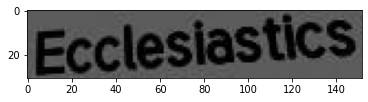

('Viêm da khác', 0.9011601954698563)


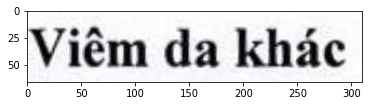

('these have come at a cost of selling land', 0.898380292624962)


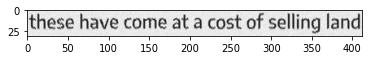

('khởi nghĩa lam sơn gồm ba giai đoạn lớn: hoạt động ở vùng núi thanh hoá (1418-1423)', 0.9004861346210342)


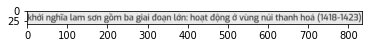

('Nguyễn Thị Hồng Huế', 0.9061529259932669)


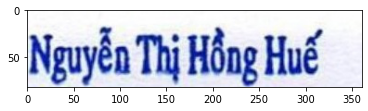

('[22]', 0.8701427727937698)


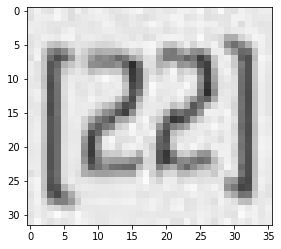

('BERLAR AREAL MADRID BẤT NGỜ ĐƯỢC TRỌNG TÀI CHO HƯỞNG MỘT QUẢ PENALTY GÂY TRANH CÃI', 0.8270815500035519)


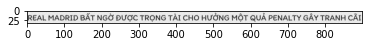

('BSCKII. LƯU CÔNG THÀNH', 0.8887340805747292)


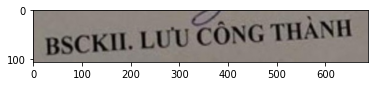

('Liên Hiệp Quốc vừa tuyên bố ngày 19-11 hằng năm là Ngày Toilet Thế giới, bắt đầu từ năm 2013', 0.8907621010490085)


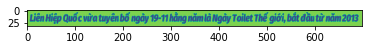

('"Viêm mô tế bào và áp xe của miệng; ( Viêm mô tế bào má 2 bên do răng 18,28,38,48 lệch ngầm trong xương)', 0.8969477621408609)


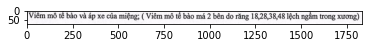

('05:', 0.6515950361887614)


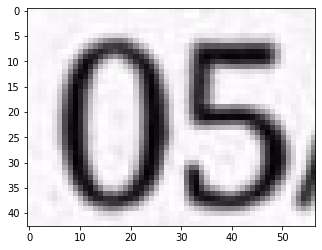

('Unmodified', 0.8015693426132202)


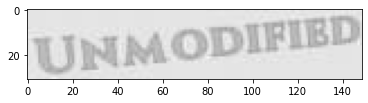

('Thanh Xuân - Hà Nội - Việt Nam', 0.8969674706459045)


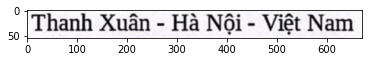

('MOJIOKER', 0.5719478819519281)


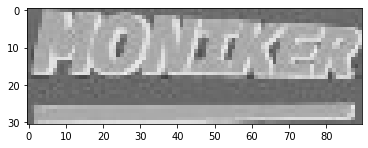

('Repurchase', 0.8914428055286407)


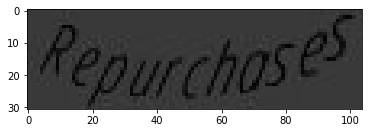

('alandladics', 0.729345215992494)


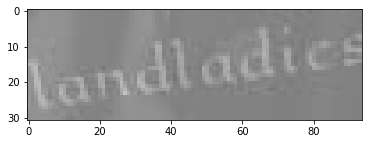

("she more than doubled the party's vote in the constituency", 0.8971251382909972)


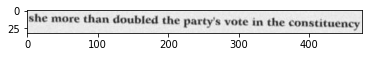

('HHHH H', 0.40442514171202976)


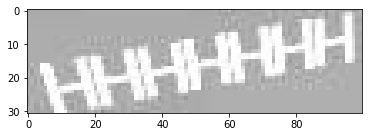

('statu&C&', 0.7968082204461098)


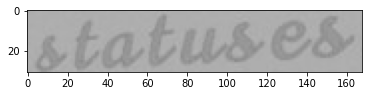

('1.21', 0.8889264166355133)


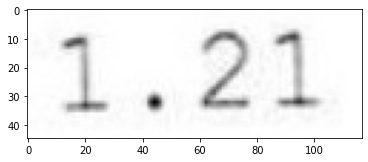

('1.00', 0.9137969017028809)


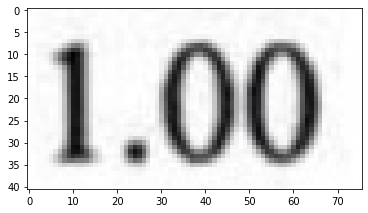

('ban goài ra rất phổ biến các loại rượu ngâm hỗn hợp nhiều loại động', 0.8520323794279525)


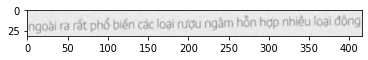

('Slfilest', 0.768750786781311)


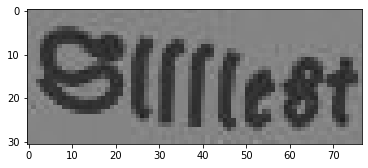

('Psị', 0.7835943500200907)


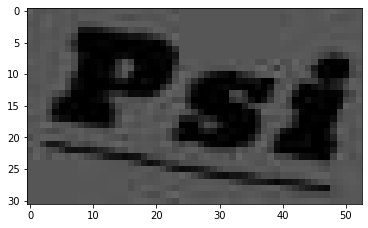

('0', 0.7452220916748047)


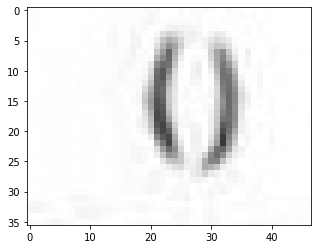

('2006 And Was Featured On Tech News Blog Techcrunch [1]', 0.9039882840933623)


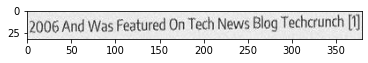

('Trong Đó Có Tổng Binh', 0.8980796422277179)


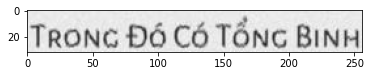

('FRESTOR', 0.6588358666215625)


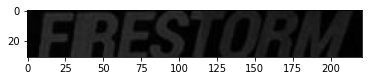

('2,625,400', 0.8878508342636956)


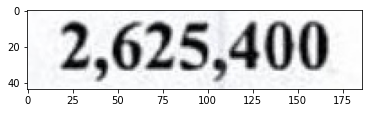

('Như trên;', 0.7537614148524072)


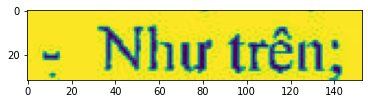

('Quân Năm Việt Nam', 0.729063819436466)


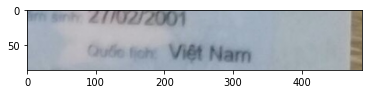

('CHOÀNG THỊ NGỌC MAI', 0.8497352286388999)


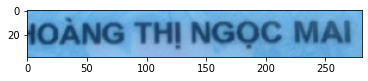

('BẠCH MỸ HẠNH', 0.9052634636561075)


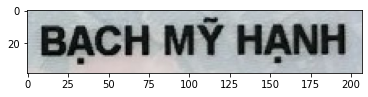

('LÊ VĂN THỨC', 0.8570217056707903)


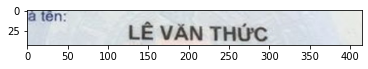

('VŨ THUỲ NINH', 0.8750604142745336)


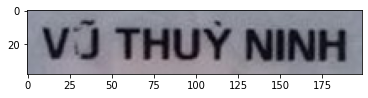

('001085019081', 0.8467753728230795)


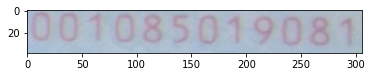

('NGUYỄN THỊ NGOÃN', 0.8900747038424015)


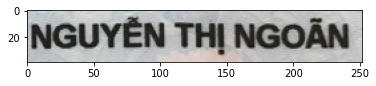

('Tổng thanh thanh toán', 0.5074811662946429)


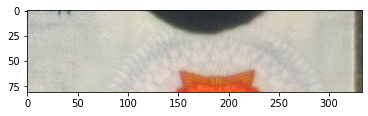

('077078001025', 0.8912428468465805)


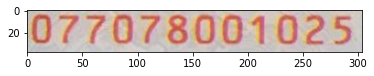

('030068003051', 0.8338572333256403)


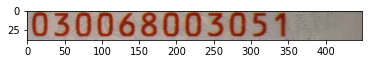

('số:07 0077001591', 0.6451676525175571)


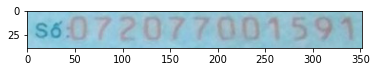

('072084003708', 0.8369651138782501)


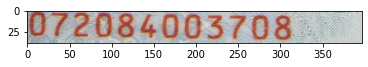

('36200006617', 0.7089737030592832)


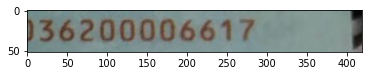

('NGUYỄN HỮU QUANG', 0.8919811062514782)


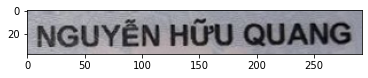

('038071004740', 0.843977818886439)


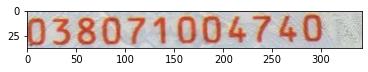

('ĐẶNG TRUNG LÝ', 0.8987056658818171)


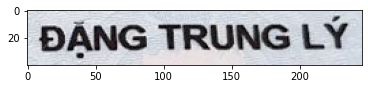

('ĐỖ THỊ ANH', 0.8665226221084594)


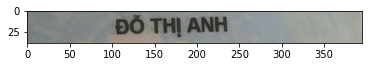

('ĐÔNG HUY THÁNG', 0.862696430512837)


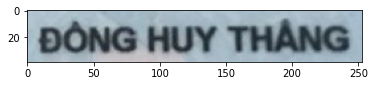

('Số: 072164001745', 0.8121312819421291)


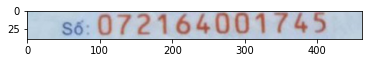

('PHAN THỊ HÔNG THẦM', 0.8483488021625413)


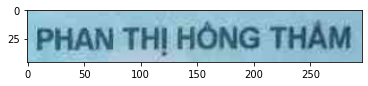

Average inference time:  0.11541326999664307


In [8]:
infer(detector, "./sample/",["jpg", "jpeg"])

In [ ]:
infer(detector, "./sample/",["jpg", "jpeg"])

In [ ]:
detector.model

VietOCR(
  (cnn): CNN(
    (model): Vgg(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace=True)
        (13): AvgPool2d(kernel_size=[

In [ ]:
from torchinfo import summary
summary(OCR_Detector(detector.model), (4,3,32,512))

Layer (type:depth-idx)                        Output Shape              Param #
OCR_Detector                                  --                        --
├─VietOCR: 1-1                                --                        --
│    └─CNN: 2-1                               [256, 4, 256]             --
│    │    └─Vgg: 3-1                          [256, 4, 256]             20,166,720
│    └─Seq2Seq: 2-2                           --                        --
│    │    └─Encoder: 3-2                      [256, 4, 512]             920,832
│    │    └─Decoder: 3-3                      [4, 233]                  1,283,561
│    │    └─Decoder: 3-4                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-5                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-6                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-7                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-8               

# Train model

## Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


### Config 1: Transformer

In [47]:
config = Cfg.load_config_from_name('vgg_transformer')
config2 = Cfg.load_config_from_name('vgg_seq2seq')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

trainer_params = {
        'batch_size': 128,
         'print_every':200,
         'valid_every':15*200,
          'iters':60000,
          'checkpoint':'./drive/MyDrive/checkpoint/transformerocr_checkpoint.pth',    
          'export':'./drive/MyDrive/weights/transformerocr.pth',
          'metrics': 100000
         }
optimizer_params = {'max_lr': 0.0005}

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config['trainer'].update(trainer_params)
config['optimizer'].update(optimizer_params)
config['dataset'].update(dataset_params)
config['dataloader'].update(dataloader_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [19]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 2, 'pin_memory': True},
 'dataset': {'data_root': '/content/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './drive/MyDrive/checkpoint/transformerocr_checkpoint.pth',
  'export': './drive/MyDrive/weights/transformerocr.pth',
  'iters': 30000,
  'lo

### Config 2: Seq2seq

In [49]:
# config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':30000,
          'checkpoint':'./drive/MyDrive/checkpoint/seq2seqocr_checkpoint.pth',    
          'export':'./drive/MyDrive/weights/seq2seqocr.pth',
          'metrics': 10000
         }

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config2['trainer'].update(params)
config2['dataset'].update(dataset_params)
config2['dataloader'].update(dataloader_params)
config2['device'] = 'cuda'

In [50]:
config2

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 2, 'pin_memory': True},
 'dataset': {'data_root': '/content/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda',
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4',
  'md5': 'efcabaa6d3adfca8e52bda2fd7d2ee04'},
 'quiet': False,
 'seq_modeling': 'seq2seq',
 'trainer': {'batch_size': 32,
  'checkpoint': './drive/MyDrive/checkpoint/seq2seqocr_checkpoint.pth',
  'export': './drive/MyDrive/weights/seq2seqocr.pth',
  'iters': 30000,
  'log': './train.log',
  'metrics': 100

## Training
You should train model from our pretrained 

In [52]:
!rm -rf train_hw
!rm -rf valid_hw
trainer = Trainer(config2, pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Computing MD5: /tmp/tranformerorc.pth


MD5 doesn't match:
actual: af6b46e9295eb1c27ca90bddf8c8729a
expected: efcabaa6d3adfca8e52bda2fd7d2ee04
Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpn91y_vky/dl
100%|██████████| 89.6M/89.6M [00:01<00:00, 86.1MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|████████████████████████████████████| 239628/239628 [03:36<00:00, 1106.61it/s]

Created dataset with 239627 samples



Create valid_hw: 100%|██████████████████████████████████████| 26625/26625 [00:25<00:00, 1062.47it/s]

Created dataset with 26624 samples



valid_hw build cluster: 100%|█████████████████████████████| 26624/26624 [00:00<00:00, 133447.52it/s]


Save model configuration for inference, load_config_from_file

In [53]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

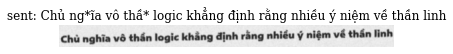

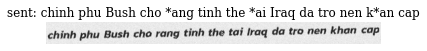

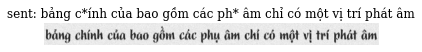

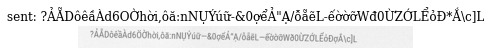

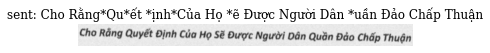

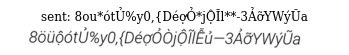

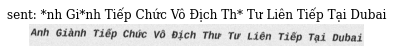

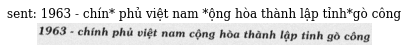

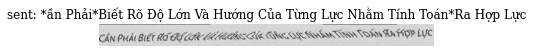

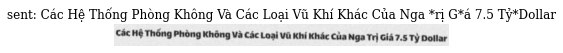

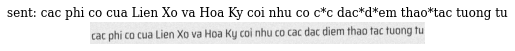

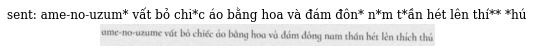

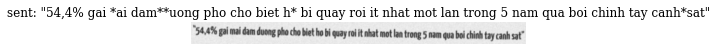

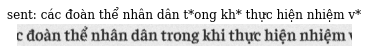

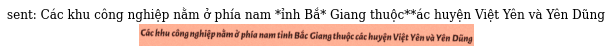

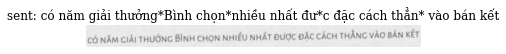

In [33]:
trainer.visualize_dataset()

Train now

In [54]:
trainer.train()

iter: 000200 - train loss: 0.869 - lr: 5.05e-05 - load time: 0.79 - gpu time: 86.52
iter: 000400 - train loss: 0.786 - lr: 8.15e-05 - load time: 0.13 - gpu time: 85.56
iter: 000600 - train loss: 0.751 - lr: 1.32e-04 - load time: 0.10 - gpu time: 87.76
iter: 000800 - train loss: 0.705 - lr: 1.99e-04 - load time: 0.10 - gpu time: 85.82
iter: 001000 - train loss: 0.683 - lr: 2.80e-04 - load time: 0.09 - gpu time: 86.73
iter: 001200 - train loss: 0.683 - lr: 3.72e-04 - load time: 0.14 - gpu time: 86.22
iter: 001400 - train loss: 0.668 - lr: 4.70e-04 - load time: 0.30 - gpu time: 82.75
iter: 001600 - train loss: 0.671 - lr: 5.70e-04 - load time: 0.11 - gpu time: 85.85
iter: 001800 - train loss: 0.669 - lr: 6.69e-04 - load time: 0.32 - gpu time: 79.30
iter: 002000 - train loss: 0.655 - lr: 7.60e-04 - load time: 0.12 - gpu time: 78.40
iter: 002200 - train loss: 0.666 - lr: 8.41e-04 - load time: 0.19 - gpu time: 86.27
iter: 002400 - train loss: 0.657 - lr: 9.09e-04 - load time: 0.31 - gpu time

In [41]:
import torch
from vietocr.optim.optim import ScheduledOptim
from torch.optim.lr_scheduler import OneCycleLR

from torch.optim import AdamW

def load_checkpoint(trainer, filename):
    checkpoint = torch.load(filename)
    trainer.optimizer = AdamW(trainer.model.parameters(), betas=(0.9, 0.98), eps=1e-09)
    trainer.optimizer.load_state_dict(checkpoint['optimizer'])
    trainer.scheduler = OneCycleLR(trainer.optimizer, total_steps=trainer.config['trainer']['iters'], **trainer.config['optimizer'])

    
    # optim = ScheduledOptim(
    #     Adam(self.model.parameters(), betas=(0.9, 0.98), eps=1e-09),
    #         self.config['transformer']['d_model'], **self.config['optimizer'])

    trainer.model.load_state_dict(checkpoint['state_dict'])
    trainer.iter = checkpoint['iter']

    trainer.train_losses = checkpoint['train_losses']


In [42]:
load_checkpoint(trainer,"./drive/MyDrive/checkpoint/transformerocr_checkpoint.pth")

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()